<style>
    .section {
        background-color: #f7f7f7;
        border-radius: 7px;
        padding: 20px;
        box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
        margin-bottom: 20px;
        max-width: 1050px;
    }

    h1 {
        color: #0077b5;
        font-size: 32px;
        text-align: center;
        margin-bottom: 20px;
    }

    h2 {
        color: #0077b5;
        font-size: 24px;
        margin-bottom: 10px;
    }

    p {
        font-size: 18px;
        line-height: 1.6;
        margin-bottom: 10px;
    }

    ul {
        list-style-type: none;
        padding-left: 0;
        font-size: 18px;
        line-height: 1.6;
    }

    li {
        margin-bottom: 5px;
    }

    .bullet {
        display: inline-block;
        width: 10px;
        height: 10px;
        border-radius: 50%;
        background-color: #0077b5;
        margin-right: 8px;
    }

    .linkedin-link {
        text-align: center;
        margin-top: 20px;
    }

    .linkedin-button {
        display: inline-block;
        background-color: #0077b5;
        color: #fff;
        padding: 15px 30px;
        border-radius: 40px;
        font-size: 18px;
        font-weight: bold;
        cursor: pointer;
        text-decoration: none;
        transition: background-color 0.3s ease;
    }

    .linkedin-button:hover {
        background-color: #005F96;
    }
</style>

<div class="section">
    <h1>K-Nearest Neighbors (K-NN)</h1>
    <p>
        K-Nearest Neighbors (K-NN) is a powerful machine learning algorithm used for classification and regression tasks. It's non-parametric and lazy, making minimal assumptions about the underlying data distribution during training.
    </p>
</div>

<div class="section">
    <h2>Why use K-Nearest Neighbors?</h2>
    <ul>
        <li><span class="bullet"></span>Easy to understand and implement.</li>
        <li><span class="bullet"></span>Does not require extensive training.</li>
        <li><span class="bullet"></span>Versatile for both classification and regression tasks.</li>
        <li><span class="bullet"></span>Adapts well to different types of data and effective in various domains.</li>
    </ul>
</div>

<div class="section">
    <h2>Applications of K-NN</h2>
    <p>
        K-NN finds its applications in recommendation systems, anomaly detection, and even in search algorithms.
    </p>
</div>

<div style="text-align: center; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/sohaib-awan-042b68244" target="_blank">
        <button style="background-color: #0077b5; color: #fff; padding: 15px 30px; border-radius: 40px; font-size: 18px; font-weight: bold; cursor: pointer;">Follow me on LinkedIn</button>
    </a>
</div>


In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn-darkgrid')

In [147]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [148]:
df = df.dropna()

In [149]:
## Indendent / Dependent Variables
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

<Axes: >

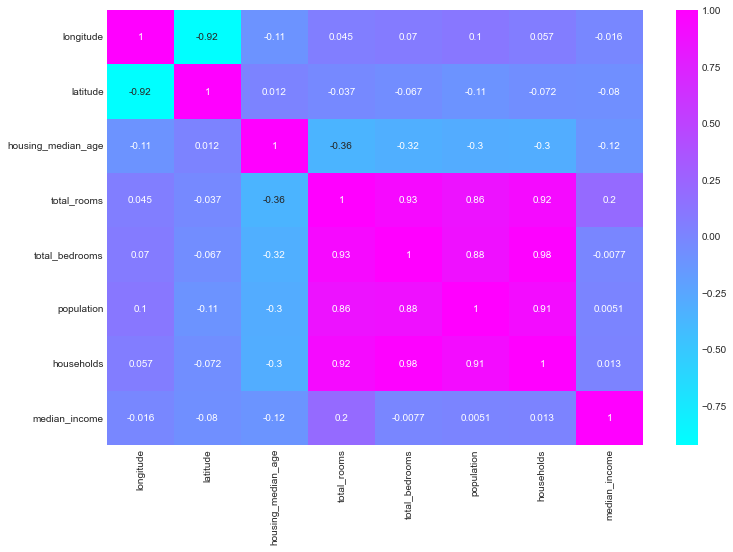

In [150]:
plt.figure(figsize=(12, 8))
# X_df = df.iloc[:, :-2]
sb.heatmap(X.corr(), annot=True, cmap="cool")

In [151]:
## Selecting the best features
select = SelectKBest(score_func=f_classif, k = 4)
X_new = select.fit_transform(X, y)

# fn = select.get_support(indices=True)
name_list = list(select.get_feature_names_out())
X = df[name_list]

In [152]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

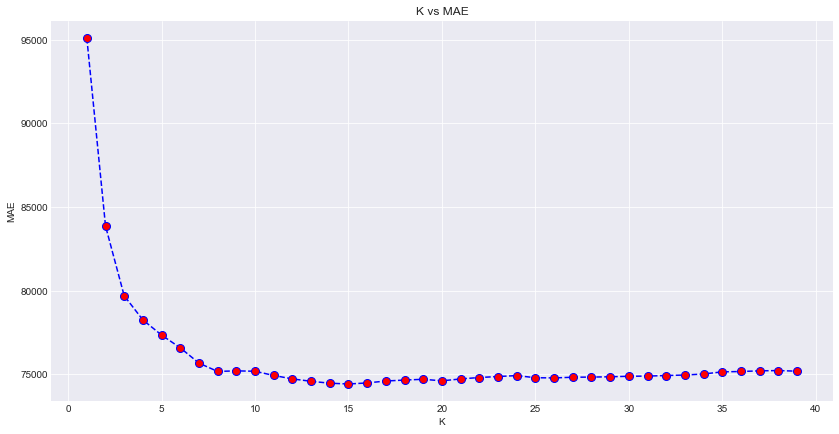

Minimum mean absolute error :  74421.82211783127  is at k =  15


In [153]:
## Finding the minimum error
error = []

for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, pred_i)
    error.append(mae)

plt.figure(figsize=(14, 7))
plt.plot(range(1, 40), error, color = "blue", linestyle = "dashed", marker = "o", 
         markerfacecolor = "red", markersize = 8)
plt.title("K vs MAE")
plt.xlabel("K")
plt.ylabel("MAE")
plt.show()

k_value = np.array(error).argmin() + 1
print("Minimum mean absolute error : ", min(error), " is at k = ", error.index(min(error))+1)

In [154]:
## Feature Scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [155]:
## Training our model
knn2 = KNeighborsRegressor(n_neighbors=12)
knn2.fit(X_train, y_train)
y_predict = knn2.predict(X_test)

In [156]:
print("R^2 is  : ", knn2.score(X_test, y_test))
print("MSE is  : ", metrics.mean_squared_error(y_test, y_predict))
print("RMSE is : ", metrics.mean_squared_error(y_test, y_predict, squared = False))
print("MAE is  : ", metrics.mean_absolute_error(y_test, y_predict))

R^2 is  :  0.7118572539764774
MSE is  :  3850879870.410791
RMSE is :  62055.45802272989
MAE is  :  42651.51675148431


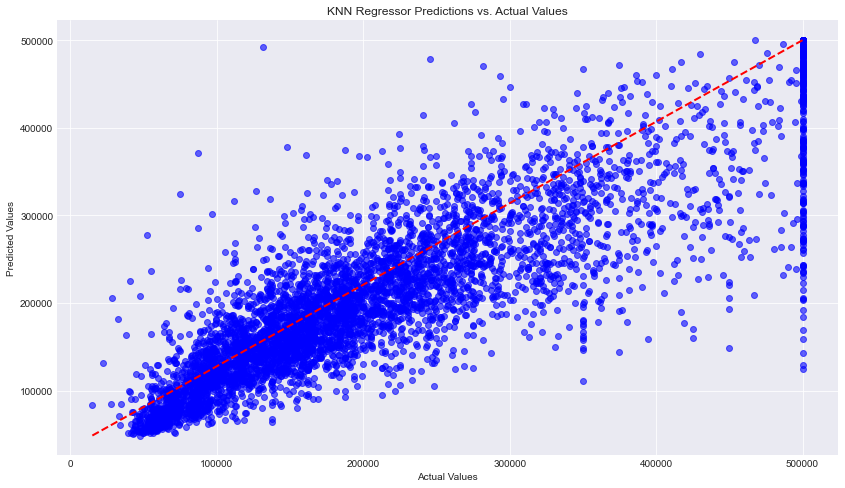

In [165]:
plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_predict, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regressor Predictions vs. Actual Values')
plt.show()

In [169]:
## predicting

longitude = -122.23
latitude = 37.88
housing_median_age = 41
total_rooms = 880
total_bedrooms = 129
population = 322
households = 126
median_income = 8.3252

input_data = np.array([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income]])
predicted_value = knn2.predict(input_data)[0]
print(predicted_value.round(2))

246433.33


In [168]:
new_data = {
    'longitude': [-112.23],
    'latitude': [30.88],
    'housing_median_age': [35],
    'total_rooms': [200],
    'total_bedrooms': [100],
    'population': [250],
    'households': [100],
    'median_income': [5.6431]
}

# Create a new DataFrame from the new data
new_df = pd.DataFrame(new_data)

# Make predictions using the KNN regressor
predicted_value = knn2.predict(new_df)

print(predicted_value[0].round(2))

238758.33
